# CS5228-KDDM, 2025/26-2, Coursework 1


#### Student Name: Lee Junyoung
#### Student Number: A0247530J

# CW1, Part 1: Data Preprocessing using Python (2+2=4 marks)

## CW1-1-1: Data Cleaning (2 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# just to show all columns in the dataframe
pd.set_option('display.max_columns', None)

Since the dataset does not have headers, the headers from the description file is used.

In [2]:
# load the dataset
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", "sex", 
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"
]

# skipinitialspace=True for spaces after commas
df = pd.read_csv('census-94-1.csv', header=None, names=columns, skipinitialspace=True)
print(f"Raw dataset shape: {df.shape}")

Raw dataset shape: (32561, 15)


To remove "dirty" records, the dataset description is referenced to validate the entries of the fields.

In [3]:
# define valid data entries based on description
valid_workclass = [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", 
    "State-gov", "Without-pay", "Never-worked"
]
valid_education = [
    "Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm", 
    "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", 
    "Doctorate", "5th-6th", "Preschool"
]
valid_marital_status = [
    "Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", 
    "Married-spouse-absent", "Married-AF-spouse"
]
valid_occupation = [
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", 
    "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", 
    "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", 
    "Armed-Forces"
]
valid_relationship = [
    "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
]
valid_race = [
    "White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"
]
valid_sex = ["Female", "Male"]
valid_country = [
    "United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", 
    "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", 
    "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", 
    "Vietnam", "Mexico", "Portugal", "Ireland", "France", "Dominican-Republic", 
    "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", 
    "Nicaragua", "Scotland", "Thailand", "Yugoslavia", "El-Salvador", 
    "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"
]
valid_class = [
    ">50K", "<=50K"
]

In [4]:
# identify dirty samples
dirty_indices = []

for index, row in df.iterrows():
    is_dirty = False
    reason = ""
    
    # check categorical columns
    if row['workclass'] not in valid_workclass:
        is_dirty = True; reason = f"Invalid workclass: {row['workclass']}"
    elif row['education'] not in valid_education:
        is_dirty = True; reason = f"Invalid education: {row['education']}"
    elif row['marital-status'] not in valid_marital_status:
        is_dirty = True; reason = f"Invalid marital-status: {row['marital-status']}"
    elif row['occupation'] not in valid_occupation:
        is_dirty = True; reason = f"Invalid occupation: {row['occupation']}"
    elif row['relationship'] not in valid_relationship:
        is_dirty = True; reason = f"Invalid relationship: {row['relationship']}"
    elif row['race'] not in valid_race:
        is_dirty = True; reason = f"Invalid race: {row['race']}"
    elif row['sex'] not in valid_sex:
        is_dirty = True; reason = f"Invalid sex: {row['sex']}"
    elif row['native-country'] not in valid_country:
        is_dirty = True; reason = f"Invalid native-country: {row['native-country']}"
    elif row['class'] not in valid_class:
        is_dirty = True; reason = f"Invalid class: {row['class']}"
    
    # check valid numeric ranges for continuous columns
    if not is_dirty:
        try:
            if not (17 <= float(row['age']) <= 90):
                 is_dirty = True; reason = f"Age out of range: {row['age']}"
            if not (1 <= float(row['education-num']) <= 16):
                 is_dirty = True; reason = f"Education-num out of range: {row['education-num']}"
            if not (1 <= float(row['hours-per-week']) <= 99):
                 is_dirty = True; reason = f"Hours-per-week out of range: {row['hours-per-week']}"
        except ValueError:
            is_dirty = True; reason = "Non-numeric value in numeric column"

    if is_dirty:
        print(f"dirty record at index {index}: {reason}")
        print(row.values)
        dirty_indices.append(index)

# drop dirty rows
df_clean = df.drop(dirty_indices)
print(f"Removed {len(dirty_indices)} dirty records.")

dirty record at index 14: Invalid native-country: ?
[40 'Private' 121772 'Assoc-voc' 11 'Married-civ-spouse' 'Craft-repair'
 'Husband' 'Asian-Pac-Islander' 'Male' 0 0 40 '?' '>50K']
dirty record at index 27: Invalid workclass: ?
[54 '?' 180211 'Some-college' 10 'Married-civ-spouse' '?' 'Husband'
 'Asian-Pac-Islander' 'Male' 0 0 60 'South' '>50K']
dirty record at index 38: Invalid native-country: ?
[31 'Private' 84154 'Some-college' 10 'Married-civ-spouse' 'Sales'
 'Husband' 'White' 'Male' 0 0 38 '?' '>50K']
dirty record at index 51: Invalid native-country: ?
[18 'Private' 226956 'HS-grad' 9 'Never-married' 'Other-service'
 'Own-child' 'White' 'Female' 0 0 30 '?' '<=50K']
dirty record at index 61: Invalid workclass: ?
[32 '?' 293936 '7th-8th' 4 'Married-spouse-absent' '?' 'Not-in-family'
 'White' 'Male' 0 0 40 '?' '<=50K']
dirty record at index 69: Invalid workclass: ?
[25 '?' 200681 'Some-college' 10 'Never-married' '?' 'Own-child' 'White'
 'Male' 0 0 40 'United-States' '<=50K']
dirty 

In [5]:
# final clean dataset info
print(f"Clean dataset shape: {df_clean.shape}")
# save the clean data file
df_clean.to_csv('result1-1.csv', index=False)

Clean dataset shape: (30160, 15)


Now we inspect columns K and L. First we plot the histogram.

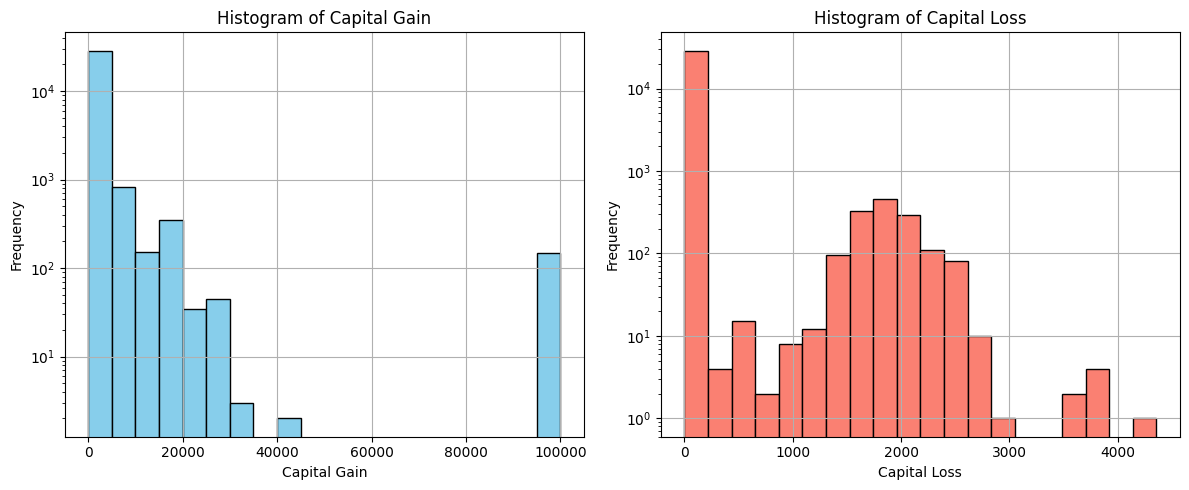

In [6]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_clean['capital-gain'].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Capital Gain')
axes[0].set_xlabel('Capital Gain')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

df_clean['capital-loss'].hist(ax=axes[1], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Capital Loss')
axes[1].set_xlabel('Capital Loss')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

### Justification:
Columns K (Capital Gain) and L (Capital Loss) are highly skewed.

The majority of values are 0, indicating that most people do not have capital gains or losses.

This sparsity and extreme skewness differentiate them from other continuous variables like age or education-num, which are more evenly distributed.